# EDA and Methodology

This section of the website displays our process of cleaning each data set and manipulating it to create our desired outputs and analysis. 

## Imports

In [5]:
# !pip install geopandas
# !pip install mapclassify
import geopandas as gpd
import mapclassify
import shapely
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', 150)

## Listings data

Important cleaning notes:

- Converted bathrooms from string to float
- Converted price from string to float, removed punctuation

In [2]:
# load listings data
listings = pd.read_csv('../inputs/listings.csv.gz', compression='gzip')

# fix to bathrooms column
num_pattern = r'(\d+\.*\d*)'
listings['bathrooms'] = listings['bathrooms_text'].str.extract(num_pattern).astype(float)

# fix prices string
listings['price'] = listings['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20230319180919,2023-03-19,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,"Massachusetts, United States",My wife and I and grown children frequently oc...,within a day,89%,22%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,4,5,"['email', 'phone']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Wifi"", ""Stove"", ""Kitchen"", ""Dishwasher"", ""Fr...",132.0,32,1125,32.0,32.0,1125.0,1125.0,32.0,1125.0,NaN,t,7,15,15,87,2023-03-19,24,2,0,2015-07-10,2022-09-05,4.96,5.00,4.96,5.00,4.96,4.88,4.92,NaN,f,1,1,0,0,0.26
1,5506,https://www.airbnb.com/rooms/5506,20230319180919,2023-03-19,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, MA","Relaxed, Easy going, Accommodating.",within an hour,100%,100%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,11,14,"['email', 'phone']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32844,-71.09581,Entire guest suite,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Wifi"", ""Keypad"", ""Free street parking"", ""Fir...",149.0,3,90,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,10,21,21,2023-03-19,118,8,0,2009-03-21,2022-12-05,4.79,4.87,4.89,4.95,4.88,4.53,4.74,Approved by the government,f,10,10,0,0,0.69
2,6695,https://www.airbnb.com/rooms/6695,20230319180919,2023-03-19,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, MA","Relaxed, Easy going, Accommodating.",within an hour,100%,100%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,11,14,"['email', 'phone']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32802,-71.09387,Entire condo,Entire home/apt,4,1.0,1 bath,NaN,2.0,"[""Wifi"", ""Stove"", ""Keypad"", ""Kitchen"", ""Dishwa...",179.0,3,730,1.0,3.0,730.0,730.0,3.0,730.0,NaN,t,9,12,16,66,2023-03-19,123,7,0,2009-08-06,2022-11-

27.74% of sales are between $200 and $500
4.14% of sales are greater than $500
68.12% of sales are less than $200


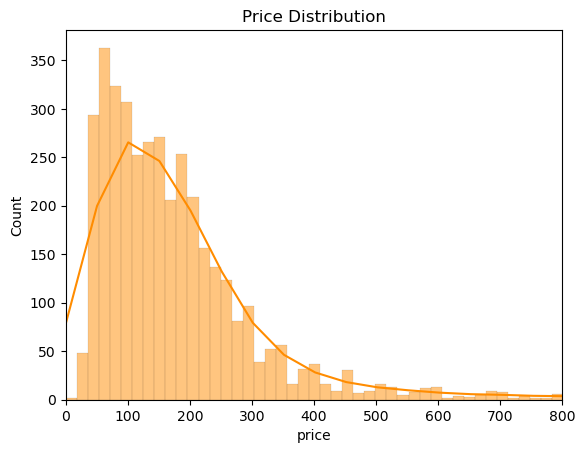

In [55]:
# listings price distribution

sns.histplot(listings['price'], 
             kde = True,
             color = 'darkorange')\
             .set(title = 'Price Distribution',
                  xlim = [0,800])

filt1 = listings[(listings['price'] >= 200) & (listings['price'] <= 500)]
percentage = (len(filt1) / len(listings)) * 100
print(f"{percentage:.2f}% of sales are between $200 and $500")
filt2 = listings[(listings['price'] > 500)]
percentage2 = (len(filt2) / len(listings)) * 100
print(f"{percentage2:.2f}% of sales are greater than $500")
filt3 = listings[(listings['price'] < 200)]
percentage3 = (len(filt3) / len(listings)) * 100
print(f"{percentage3:.2f}% of sales are less than $200")

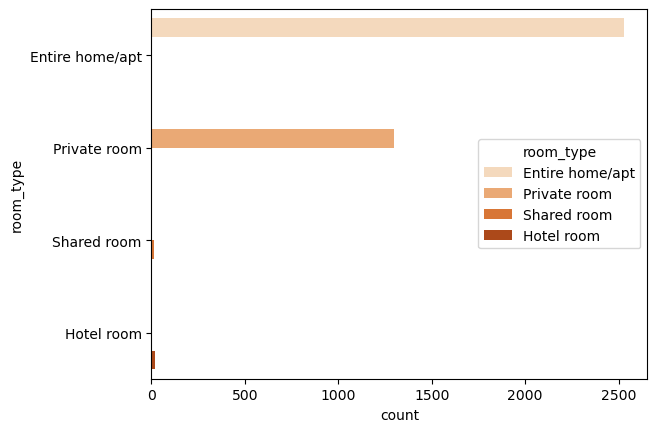

In [47]:
# room type distribution

ax = sns.countplot(data = listings,
                   y = 'room_type',
                   hue = 'room_type',
                   palette = 'Oranges')

sns.move_legend(ax, "center right")

In [4]:
# listings by neighborhood

listings['neighbourhood_cleansed'].value_counts()

Dorchester                 511
Downtown                   351
Roxbury                    291
Brighton                   290
Back Bay                   275
South End                  264
East Boston                226
Jamaica Plain              215
Allston                    192
South Boston               170
Beacon Hill                169
Fenway                     163
North End                  107
Chinatown                   99
Charlestown                 75
Roslindale                  67
Hyde Park                   65
Mission Hill                64
Mattapan                    55
Bay Village                 53
South Boston Waterfront     51
West Roxbury                51
West End                    47
Leather District             8
Longwood Medical Area        5
Name: neighbourhood_cleansed, dtype: int64

## Reviews data

Important notes:

- Converted date to datetime

In [36]:
reviews = pd.read_csv('../inputs/reviews.csv.gz', compression='gzip')
reviews["date"] = pd.to_datetime(reviews["date"])
reviews = reviews.drop('id', axis=1)
reviews.head()`

,listing_id,date,reviewer_id,reviewer_name,comments
0,3781,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


In [78]:
# reviews by listing

reviews.groupby(['listing_id'])['comments'].count().sort_values(ascending = False).head()

listing_id
4090224     821
815639      761
18290558    758
916123      750
18584891    691
Name: comments, dtype: int64

## Calendar data

Important notes:

- Converted date to datetime

In [40]:
calendar = pd.read_csv('../inputs/calendar.csv.gz', compression='gzip')
calendar["date"] = pd.to_datetime(calendar["date"])
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2023-03-19,f,$125.00,$125.00,32.0,1125.0
1,3781,2023-03-20,f,$125.00,$125.00,32.0,1125.0
2,3781,2023-03-21,f,$125.00,$125.00,32.0,1125.0
3,3781,2023-03-22,f,$125.00,$125.00,32.0,1125.0
4,3781,2023-03-23,f,$125.00,$125.00,32.0,1125.0


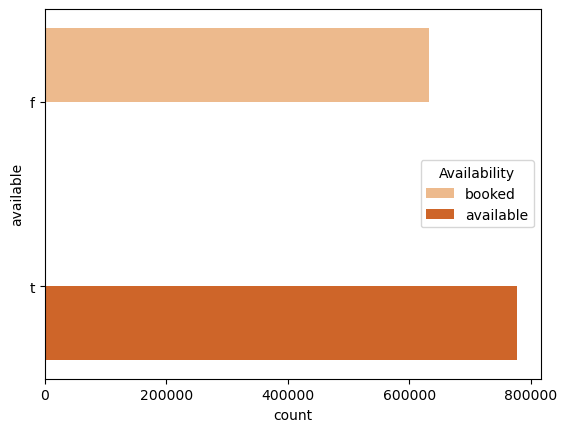

In [52]:
# vacancy statistics

calendar['Availability'] = np.where(calendar['available'] == 't', 'available', 'booked')

ax = sns.countplot(data = calendar,
              y = 'available',
              hue = 'Availability',
              palette = 'Oranges')\
              .set(xticks = [0,200000,400000,600000,800000])

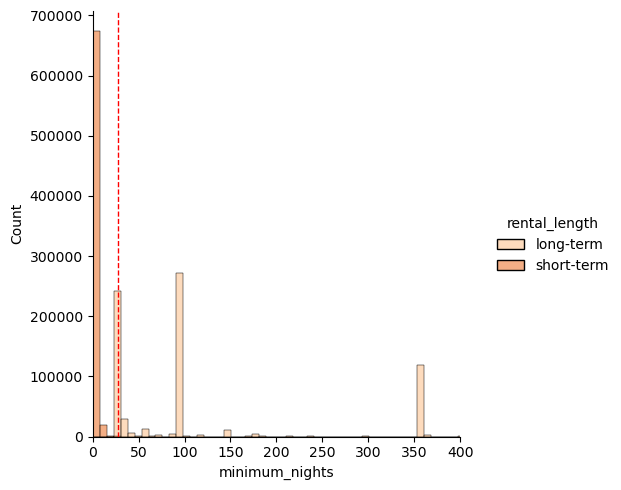

In [62]:
# rental length distribution

calendar['rental_length'] = np.where(calendar['minimum_nights'] < 28, 'short-term', 'long-term')

ax = sns.displot(data = calendar,
                 x = 'minimum_nights',
                 kind = 'hist',
                 bins = 80,
                 hue = 'rental_length',
                 palette = 'Oranges')\
                 .set(xlim = [0,400])

ax.refline(x = 28,
           color = "red",
           lw = 1)

sns.move_legend(ax, "center right")